In [2]:
# Example of Tool Functionalities using some fake generated cell data

In [37]:
# 1. Import

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv as cv
import classes.data_prep as prep
import classes.gp as gp
import classes.data_visualisation as visualisation
import classes.optimisation as optimisation
import classes.gillespie as gillespie
import classes.model_selection as model_selection
from matplotlib.backends.backend_pdf import PdfPages

import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

Text(0, 0.5, 'Gene Expression Level')

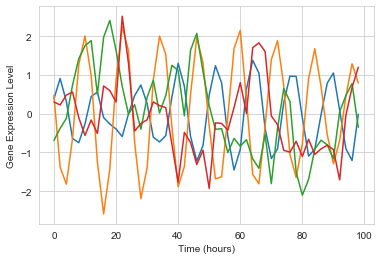

In [38]:
# 2. Generate Fake Data using the Prior GP Function

# Creating observations, 10 oscillating cells.
observed_cells = gp.GP(alpha = 0.005, beta = 0.5, variance = 1.0, noise = 0.0, oscillatory = True)
observed_cells = observed_cells.generate_prior_ou_trace(duration = 100, number_of_observations = 500, number_of_traces = 10)
observation_id = np.arange(0, 500, 10) #50 observations
observed_cells = observed_cells[observation_id, :]

# Creating control data, 10 non-oscillating cells.
control_cells = gp.GP(alpha = 0.2, beta = 0.0, variance = 1.0, noise = 0.0, oscillatory = False)
control_cells = control_cells.generate_prior_ou_trace(duration = 100, number_of_observations = 500, number_of_traces = 10)
control_cells = control_cells[observation_id, :]

# Merge
observed_timepoints = observed_cells[:,0]
cells = np.hstack((observed_cells[:,1:11], control_cells[:,1:11]))

# Plot some observed_cells
plt.plot(observed_timepoints, cells[:,8:12])
plt.xlabel("Time (hours)")
plt.ylabel("Gene Expression Level")

- - - Select some arbitrary parameters for the GP fit to observe an initial Prior and Posterior Fit - - -
Input alpha:0.0005
Input beta:0.5
Input variance:1.0
Input noise:1.0


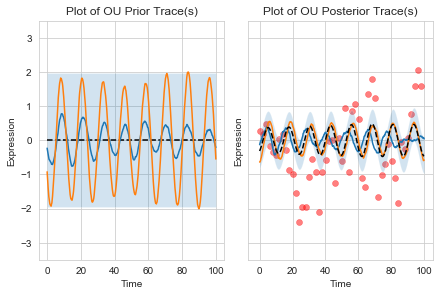

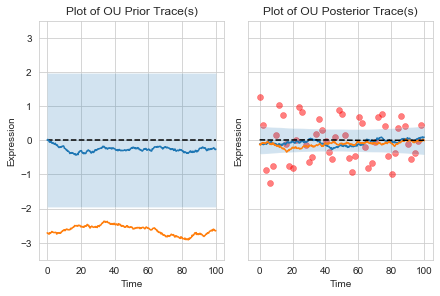

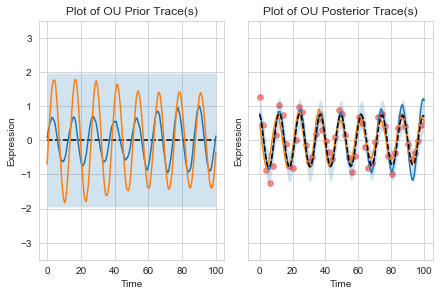

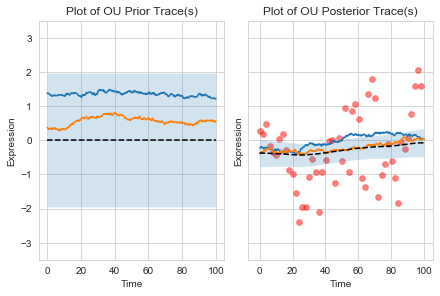

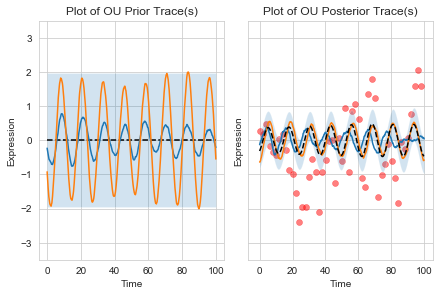

In [39]:
# 2. Initial Plot of GP Fit for some arbitrary parameters for one cell.

print("- - - Select some arbitrary parameters for the GP fit to observe an initial Prior and Posterior Fit - - -")

alpha = float(input("Input alpha:"))
beta = float(input("Input beta:"))
variance = float(input("Input variance:"))
noise = float(input("Input noise:"))

# - - - - Observed Cell

GP_OU_fit_arbitrary_parameters = visualisation.Visualisation_GP(alpha = alpha, beta = beta, variance = variance, noise = noise, oscillatory = False, observed_timepoints = observed_timepoints, observed_y = cells[:,0], cholesky_decompose = True)
GP_OUosc_fit_arbitrary_parameters = visualisation.Visualisation_GP(alpha = alpha, beta = beta, variance = variance, noise = noise, oscillatory = True, observed_timepoints = observed_timepoints, observed_y = cells[:,0], cholesky_decompose = True)

# OU Model - Non Oscillatory Fit
GP_OU_fit_arbitrary_parameters.gp_ou_trace_subplot(duration = 100, number_of_observations = 500, number_of_traces = 2)[0]
# OUosc Model - Oscillatory Fit
GP_OUosc_fit_arbitrary_parameters.gp_ou_trace_subplot(duration = 100, number_of_observations = 500, number_of_traces = 2)[0]

# - - - - Control Cell

control_GP_OU_fit_arbitrary_parameters = visualisation.Visualisation_GP(alpha = alpha, beta = beta, variance = variance, noise = noise, oscillatory = False, observed_timepoints = observed_timepoints, observed_y = cells[:,12], cholesky_decompose = True)
control_GP_OUosc_fit_arbitrary_parameters = visualisation.Visualisation_GP(alpha = alpha, beta = beta, variance = variance, noise = noise, oscillatory = True, observed_timepoints = observed_timepoints, observed_y = cells[:,12], cholesky_decompose = True)

# OU Model - Non Oscillatory Fit
control_GP_OU_fit_arbitrary_parameters.gp_ou_trace_subplot(duration = 100, number_of_observations = 500, number_of_traces = 2)[0]
# OUosc Model - Oscillatory Fit
control_GP_OUosc_fit_arbitrary_parameters.gp_ou_trace_subplot(duration = 100, number_of_observations = 500, number_of_traces = 2)[0]

In [40]:
# 3. Hyper Parameter Estimation for one Cell

observed_optim = optimisation.Optimisation(oscillatory = True, observed_timepoints = observed_timepoints, observed_y = cells[:,0])
observed_optim = observed_optim.optimizing_neg_marginal_loglikelihood_callback(start_values = [0.0001, 0.0001, 0.0001, 0.0001], callback = True)

optim = observed_optim[0]
optim_results = observed_optim[0].x
print("- - - Comparing estimated parameters versus input ones for Oscillatory Model - - -")
print("Estimated Alpha:", optim_results[0], "Input Alpha:", alpha)
print("Estimated Beta:", optim_results[1], "Input Beta:", beta)
print("Estimated Variance:", optim_results[2], "Input Variance:", variance)
print("Estimated Noise:", optim_results[3], "Input Noise:", noise)

Callback for the Optimisation Function:
Iter    Alpha       Beta        Variance    Noise        Log Marginal Likelihood
 354    0.024816    0.000100    0.024817    0.012080     3373.719709
 355    0.027910    0.000100    0.027938    0.012844     2668.583328
 356    0.035457    0.000101    0.035568    0.014380     1649.478769
 357    0.042854    0.000102    0.043079    0.015503     1122.492529
 358    0.052683    0.000104    0.053118    0.016514     734.492971
 359    0.064185    0.000106    0.064969    0.017110     487.268076
 360    0.078207    0.000110    0.079590    0.017115     321.936718
 361    0.094861    0.000116    0.097238    0.016239     214.492900
 362    0.114559    0.000125    0.118568    0.014135     144.906847
 363    0.137438    0.000139    0.144058    0.010422     100.727862
 364    0.163468    0.000162    0.174141    0.004742     73.336008
 365    0.192184    0.000199    0.208881   -0.003104     56.983002
 366    0.222528    0.000261    0.247649   -0.012787     47.7

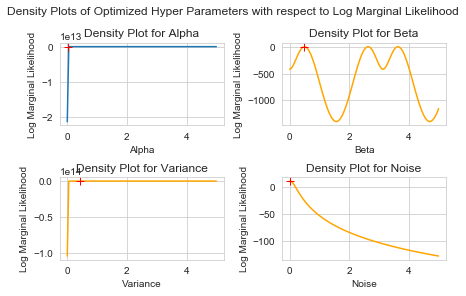

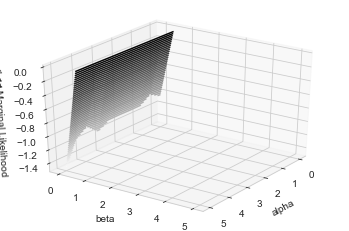

In [44]:
# 4. Optimisation Plots

optimisation_plot = visualisation.Visualisation_Optimiser(oscillatory = True, observed_timepoints = observed_timepoints, observed_y = cells[:,0], optimizer_result = optim)
optimisation_plot.plotting_hyperparameters_densities_2d()
plt.show()
optimisation_plot.plotting_hyperparameters_densities_3d(range = [0,5], hyperparameters = ['alpha', 'beta'])
plt.show()

In [ ]:
# 5. 